### 2.2 Importing Librairies

In [3]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen

print("*********   Loaded library     ***********")

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

*********   Loaded library     ***********


### 2.3 Data Cleaning  

In [578]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table=soup.find('table', attrs={'class':'wikitable sortable'})

In [579]:

PostalCodes=[]
Boroughs = []
Neighbourhoods = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    
    if len(cells)==3:
        PostalCodes.append(cells[0].find(text=True))
        Boroughs.append(cells[1].find(text=True))
        Neighbourhoods.append(cells[2].find(text=True))

In [580]:
df=pd.DataFrame(PostalCodes,columns=['Postal Code'])
df['Borough'] = Boroughs
df['Neighbourhood']=Neighbourhoods
df = df.drop(df[(df.Borough=='Not assigned\n')].index)
df['Postal Code'] = df['Postal Code'].str.replace('\n','')
df['Borough'] = df['Borough'].str.replace('\n','')
df['Neighbourhood'] = df['Neighbourhood'].str.replace('\n','')
df['Neighbourhood'] = df['Neighbourhood'].str.replace('/',', ')
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df['Neighbourhood'] = df['Neighbourhood'].apply(lambda x: x.split(', '))
df = df.explode('Neighbourhood')
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Manor
3,M6A,North York,Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park
4,M7A,Downtown Toronto,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,Malvern


In [587]:
dfGeo = pd.read_csv("http://cocl.us/Geospatial_data")
dfGeo.set_index("Postal Code")
df.set_index("Postal Code")

TorontoData = pd.merge(df,dfGeo)

In [588]:
TorontoData.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
5,M6A,North York,Lawrence Heights,43.718518,-79.464763
6,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
7,M7A,Downtown Toronto,Ontario Provincial Government,43.662301,-79.389494
8,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
9,M1B,Scarborough,Malvern,43.806686,-79.194353


The second Data which is the crimes in Toronto Neighborhoods loaded by a CSV file taken by Toronto polish departement 

## Part one : Crimes data in Toronto Neighborhood : 

In [481]:
CrimeData = pd.read_csv(r'C:\Users\Soheib\Desktop\neigh.csv')

In [482]:
CrimeData.drop(['Assault_2014' , 'Assault_2015' , 'Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_Rate_2019','Assault_CHG'] , axis = 1 ,inplace=True)
CrimeData.drop(['AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_Rate_2019','AutoTheft_Rate_2019','BreakandEnter_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_Rate_2019','Homicide_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_Rate_2019','TheftOver_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_Rate_2019','Robbery_CHG'] , axis = 1 , inplace = True)
CrimeData.drop('OBJECTID',axis=1,inplace=True)
CrimeData.drop('Shape__Area',axis=1,inplace=True)
CrimeData.drop('Shape__Length',axis=1,inplace=True)

CrimeData.head()

,Neighbourhood,Hood_ID,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
0,Yonge-St.Clair,97,12528,31.0,4.3,23.3,0.0,5.7,4.3
1,York University Heights,27,27593,333.2,106.3,113.2,0.8,75.8,36.3
2,Lansing-Westgate,38,16164,70.7,23.7,38.8,1.7,14.7,7.0
3,Yorkdale-Glen Park,31,14804,160.2,55.5,63.3,1.2,31.5,22.5
4,Stonegate-Queensway,16,25051,83.2,28.7,52.8,0.0,20.7,6.0


In [483]:
CrimeData.shape

(140, 9)

In [484]:
col_list = list(CrimeData)
col_list.remove('Hood_ID')
col_list.remove('Population')
CrimeData["total"]=CrimeData[col_list].sum(axis=1)
CrimeData.sort_values(['total'], ascending = False, axis = 0, inplace = True )
CrimeData.head()

,Neighbourhood,Hood_ID,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
39,Waterfront Communities-The Island,77,65913,851.8,53.7,247.3,1.0,82.2,56.2,1292.2
93,Bay Street Corridor,76,25797,771.0,32.8,158.7,1.5,121.3,52.3,1137.6
22,Church-Yonge Corridor,75,31340,642.8,37.8,188.5,2.0,135.7,33.8,1040.6
41,West Humber-Clairville,1,33312,301.8,366.7,137.8,1.5,91.8,52.2,951.8
131,Moss Park,73,20506,474.7,30.2,148.5,2.5,125.5,18.8,800.2


In [485]:
Crim = CrimeData.reset_index()
Crim.drop('index',axis=1,inplace=True)
Crim.head(10)

,Neighbourhood,Hood_ID,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
0,Waterfront Communities-The Island,77,65913,851.8,53.7,247.3,1.0,82.2,56.2,1292.2
1,Bay Street Corridor,76,25797,771.0,32.8,158.7,1.5,121.3,52.3,1137.6
2,Church-Yonge Corridor,75,31340,642.8,37.8,188.5,2.0,135.7,33.8,1040.6
3,West Humber-Clairville,1,33312,301.8,366.7,137.8,1.5,91.8,52.2,951.8
4,Moss Park,73,20506,474.7,30.2,148.5,2.5,125.5,18.8,800.2
5,York University Heights,27,27593,333.2,106.3,113.2,0.8,75.8,36.3,665.6
6,Downsview-Roding-CFB,26,35052,395.8,107.8,78.8,1.3,64.7,15.2,663.6
7,Kensington-Chinatown,78,17945,368.2,27.5,150.8,1.5,64.0,26.7,638.7
8,Woburn,137,53485,384.7,46.0,105.2,1.2,83.5,13.7,634.3
9,West Hill,136,27392,402.0,26.5,82.5,0.8,65.2,6.7,583.7


-------------------------------------------------------------------------------------------------------------------------------

In [79]:
CLIENT_ID = 'USPSL4O2D3FLVL1HDEP4JRRH1QE1QD1NYVNLJP502ZECCQGE' # your Foursquare ID
CLIENT_SECRET = 'ZRQ15TPTGQTUGCA3BJISCYVINHAG4WBRF00VPCMISBW3QJBF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: USPSL4O2D3FLVL1HDEP4JRRH1QE1QD1NYVNLJP502ZECCQGE
CLIENT_SECRET:ZRQ15TPTGQTUGCA3BJISCYVINHAG4WBRF00VPCMISBW3QJBF


-------------------------------------------------------------------------------------------------------------------------------

## Part two : list of Toronto Neighborhoodss and their Boroughs :

In [511]:
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
url = 'https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [512]:
table=soup.find('tbody')
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [513]:
Boroughs = []
Neighbourhoods = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    
    if len(cells)==5:
       
        Boroughs.append(cells[2].find(text=True))
        Neighbourhoods.append(cells[3].find(text=True))

In [514]:
df4=pd.DataFrame(Boroughs,columns=['Borough'])
df4['Neighbourhood']=Neighbourhoods
df4.head()

,Borough,Neighbourhood
0,Scarborough\n,Agincourt
1,Scarborough\n,Agincourt
2,Etobicoke\n,Alderwood
3,Old City of Toronto\n,The Annex
4,North York\n,Don Mills


In [515]:
df4['Borough'] = df4['Borough'].str.replace('\n','')
df4['Neighbourhood'] = df4['Neighbourhood'].str.replace('\n','')


In [516]:
df4['Borough'].value_counts()

Old City of Toronto    44
North York             33
Scarborough            25
Etobicoke              20
York                   10
East York               8
Name: Borough, dtype: int64

In [517]:
df4.head(10)

,Borough,Neighbourhood
0,Scarborough,Agincourt
1,Scarborough,Agincourt
2,Etobicoke,Alderwood
3,Old City of Toronto,The Annex
4,North York,Don Mills
5,North York,Bathurst Manor
6,Old City of Toronto,Bay Street
7,North York,Bayview Village
8,North York,Bayview Woods
9,North York,Bedford Park


## Part three : Crimes in Toronto boroughs 

### Merging the date of part one and two 

In [518]:
df_merge = pd.merge(df4, CrimeData )

In [519]:
df_merge2.sort_values(['total'], ascending = False, axis = 0, inplace = True )
DATA = df_merge2.reset_index()
DATA.drop('index',axis=1,inplace=True)
DATA


,Borough,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
0,Scarborough,259450,1635.9,306.2,584.5,5.6,354.4,70.3,2956.9
1,North York,162689,811.6,263.7,315.2,3.1,157.8,63.2,1614.6
2,Etobicoke,89067,550.1,112.1,193.6,2.2,71.9,31.5,961.4
3,Old City of Toronto,82751,527.2,76.5,233.8,2.1,74.5,33.2,947.3
4,York,34803,225.0,40.2,50.5,1.5,48.1,5.2,370.5
5,East York,27699,138.6,12.9,57.9,0.9,23.1,6.9,240.3


###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Methodology Section 

1. The methodology in this project consists of two parts: <br>
.<span style='color:Blue'> Exploratory Data Analysis: </span> Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.<br>
.<span style='color:Blue'> Modeling: </span> To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size.We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

## Exploratory Data Analysis :

In [504]:
DATA.describe()

,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,109409.833333,648.066667,135.266667,239.250000,2.566667,121.633333,35.050000,1181.833333
std,87997.824224,541.351227,121.420602,197.784719,1.658513,122.718600,27.329307,998.648306
min,27699.000000,138.600000,12.900000,50.500000,0.900000,23.100000,5.200000,240.300000
25%,46790.000000,300.550000,49.275000,91.825000,1.650000,54.050000,13.050000,514.700000
50%,85909.000000,538.650000,94.300000,213.700000,2.150000,73.200000,32.350000,954.350000
75%,144283.500000,746.225000,225.800000,294.850000,2.875000,136.975000,55.700000,1451.300000
max,259450.000000,1635.900000,306.200000,584.500000,5.600000,354.400000,70.300000,2956.900000


In [505]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.3


In [524]:
df_top5 = DATA.head(5)

In [525]:
df_top5

,Borough,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
0,Scarborough,259450,1635.9,306.2,584.5,5.6,354.4,70.3,2956.9
1,North York,162689,811.6,263.7,315.2,3.1,157.8,63.2,1614.6
2,Etobicoke,89067,550.1,112.1,193.6,2.2,71.9,31.5,961.4
3,Old City of Toronto,82751,527.2,76.5,233.8,2.1,74.5,33.2,947.3
4,York,34803,225.0,40.2,50.5,1.5,48.1,5.2,370.5


### Visualize the five boroughs with the highest number of crimes

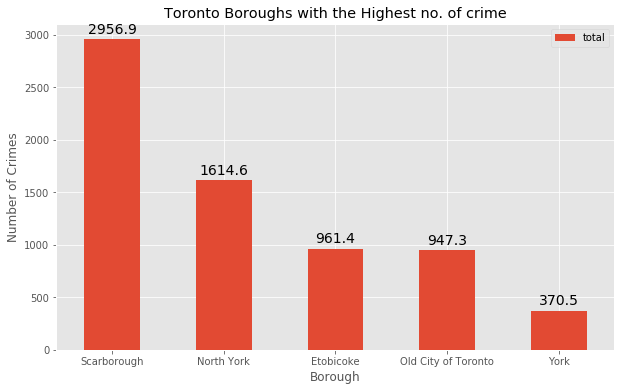

In [526]:
df_tt = df_top5[['Borough','total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Toronto Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Visualize the population

In [533]:
import matplotlib.pyplot as plt

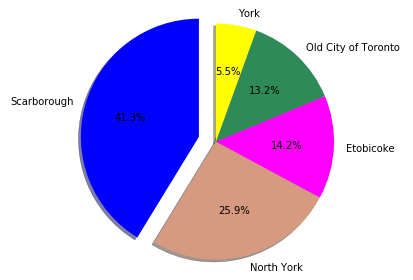

In [541]:

colors = ["#0000FF", "#D69A80", "#FF00FF", "#2E8B57", "#FFFF00"]
plt.pie(df_top5['Population'],  labels=df_top5['Borough'], shadow=True, colors=colors,  explode=(0.15, 0, 0, 0, 0),  startangle=90, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()



## Visualize the three boroughs with the least number of crimes

In [546]:
df_merge2.sort_values(['total'], ascending = True, axis = 0, inplace = True )
DATA_2 = df_merge2.reset_index()
DATA_2.drop('index',axis=1,inplace=True)
DATA_DOWN= DATA_2.head(3)
DATA_DOWN

,Borough,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,total
0,East York,27699,138.6,12.9,57.9,0.9,23.1,6.9,240.3
1,York,34803,225.0,40.2,50.5,1.5,48.1,5.2,370.5
2,Old City of Toronto,82751,527.2,76.5,233.8,2.1,74.5,33.2,947.3


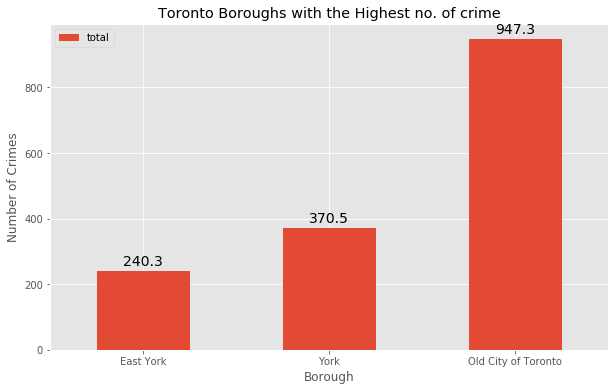

In [547]:
df_tt = DATA_DOWN[['Borough','total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Toronto Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### The borough <span style='color:Blue'> East York </span> has the lowest no. of crimes recorded for the year 2016, Looking into the details of the borough:

In [735]:
df_best = DATA_DOWN[DATA_DOWN['Borough'] == 'East York']
df_best = df_best[['Borough','Population','total']]
df_best

,Borough,Population,total
0,East York,27699,240.3


In [770]:
cond = df['Borough']=='East York' 
fin = df[cond]
final_data = fin.reset_index()
final_data.drop('index',axis=1,inplace=True)
final_data.head()

,Postal Code,Borough,Neighbourhood
0,M4B,East York,Parkview Hill
1,M4B,East York,Woodbine Gardens
2,M4C,East York,Woodbine Heights
3,M4G,East York,Leaside
4,M4H,East York,Thorncliffe Park


In [771]:
df_Ey = DATA_DOWN[DATA_DOWN['Borough']=='East York']
df_Ey.drop('Population', axis = 1 , inplace = True )
df_Ey.drop('total', axis = 1 , inplace = True )
df_Ey.set_index('Borough',inplace = True)

C:\Users\Soheib\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


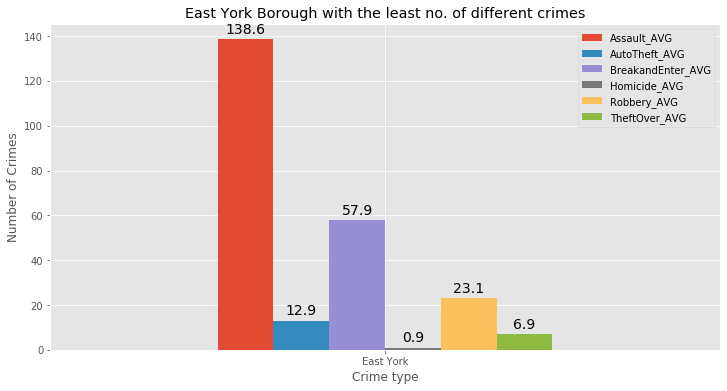

In [772]:


ax = df_Ey.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Crime type') # add y-label to the plot
ax.set_title('East York Borough with the least no. of different crimes') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### We conclude that East York is the safest Borough in Toronto 

# Part 3: Creating a new dataset of the Neighborhoods of the safest borough in Toronto and generating their coordinates : 

In [773]:
cond = TorontoData['Borough']=='East York' 
fin = TorontoData[cond]
final_data = fin.reset_index()
final_data.drop('index',axis=1,inplace=True)
final_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4B,East York,Parkview Hill,43.706397,-79.309937
1,M4B,East York,Woodbine Gardens,43.706397,-79.309937
2,M4C,East York,Woodbine Heights,43.695344,-79.318389
3,M4G,East York,Leaside,43.709060,-79.363452
4,M4H,East York,Thorncliffe Park,43.705369,-79.349372
5,M4J,East York,East Toronto,43.685347,-79.338106


### now we will search the safest Neighborhood in East York : 

In [775]:
EY = pd.merge(final_data,Crim)


In [776]:
address = 'Thorncliffe Park, Toronto, Canada'
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of East York, Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East York, Toronto are 43.704553, -79.3454074.


### Visualize the Neighborhood of Kingston upon Thames Borough

In [777]:
map_lon = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_data['Latitude'], final_data['Longitude'], final_data['Borough'], final_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon


Modelling 
Finding all the venues within a 500 meter radius of each neighborhood.
Perform one hot ecoding on the venues data.
Grouping the venues by the neighborhood and calculating their mean.
Performing a K-means clustering (Defining K = 5)

## Create a function to extract the venues from each Neighborhood

In [778]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [779]:
k_venues = getNearbyVenues(names=final_data['Neighbourhood'],
                                   latitudes=final_data['Latitude'],
                                   longitudes=final_data['Longitude']
                                  )

Parkview Hill 
 Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto


In [780]:
print(k_venues.shape)
k_venues.head()

(283, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,Parkview Hill,43.706397,-79.309937,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
2,Parkview Hill,43.706397,-79.309937,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.706397,-79.309937,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery
4,Parkview Hill,43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center


In [781]:
k_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Woodbine Gardens,21,21,21,21,21,21
East Toronto,96,96,96,96,96,96
Leaside,63,63,63,63,63,63
Parkview Hill,21,21,21,21,21,21
Thorncliffe Park,51,51,51,51,51,51
Woodbine Heights,31,31,31,31,31,31


In [782]:
print('There are {} uniques categories.'.format(len(k_venues['Venue Category'].unique())))

There are 94 uniques categories.


### One hot encoding

In [783]:
k_onehot = pd.get_dummies(k_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
k_onehot['Neighborhood'] = k_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [k_onehot.columns[-1]] + list(k_onehot.columns[:-1])
k_onehot = k_onehot[fixed_columns]

k_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bike Shop,Bookstore,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cheese Shop,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hostel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Nail Salon,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Shopping Mall,Skating Rink,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Video Store,Warehouse Store,Wine Shop,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [784]:
k_grouped = k_onehot.groupby('Neighborhood').mean().reset_index()
k_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bike Shop,Bookstore,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cheese Shop,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hostel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Nail Salon,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Shopping Mall,Skating Rink,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Video Store,Warehouse Store,Wine Shop,Yoga Studio
0,Woodbine Gardens,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.00000,0.000000,0.000000,0.000000,0.047619,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.095238,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.047619,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,East Toronto,0.000000,0.020833,0.010417,0.000000,0.000000,0.010417,0.000000,0.020833,0.020833,0.020833,0.03125,0.010417,0.000000,0.010417,0.020833,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417,0.010417,0.083333,0.010417,0.010417,0.072917,0.000000,0.031250,0.000000,0.000000,0.000000,0.010417,0.010417,0.010417,0.010417,0.010417,0.000000,0.03125,0.000000,0.010417,0.031250,0.010417,0.010417,0.000000,0.000000,0.000000,0.020833,0.010417,0.052083,0.010417,0.000000,0.000000,0.000000,0.010417,0.000000,0.010417,0.000000,0.010417,0.000000,0.000000,0.010417,0.010417,0.010417,0.020833,0.010417,0.000000,0.020833,0.010417,0.010417,0.000000,0.020833,0.031250,0.000000,0.010417,0.020833,0.010417,0.010417,0.010417,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833,0.000000,0.010417,0.000000,0.000000,0.010417,0.010417,0.000000,0.000000,0.010417,0.000000
2,Leaside,0.000000,0.000000,0.000000,0.000000,0.015873,0.015873,0.015873,0.015873,0.031746,0.000000,0.00000,0.015873,0.015873,0.000000,0.015873,0.031746,0.000000,0.031746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063492,0.000000,0.015873,0.015873,0.015873,0.031746,0.015873,0.000000,0.000000,0.000000,0.000000,0.047619,0.00000,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.015873,0.000000,0.015873,0.000000,0.000000,0.015873,0.015873,0.015873,0.015873,0.015873,0.000000,0.015873,0.015873,0.000000,0.000000,0.015873,0.000000,0.000000,0.015873,0.015873,0.000000,0.000000,0.015873,0.015873,0.000000,0.000000,0.015873,0.031746,0.000000,0.031746,0.015873,0.015873,0.000000,0.015873,0.063492,0.031746,0.015873,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Parkview Hill,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.0476

In [652]:
k_grouped.shape

(6, 95)

In [654]:
num_top_venues = 5

for hood in k_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = k_grouped[k_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Woodbine Gardens----
                  venue  freq
0               Brewery  0.10
1           Coffee Shop  0.10
2  Fast Food Restaurant  0.10
3           Pizza Place  0.10
4             Gastropub  0.05


----East Toronto----
                  venue  freq
0                  Café  0.08
1           Coffee Shop  0.07
2      Greek Restaurant  0.05
3           Pizza Place  0.03
4  Fast Food Restaurant  0.03


----Leaside----
                    venue  freq
0             Coffee Shop  0.06
1     Sporting Goods Shop  0.06
2       Electronics Store  0.05
3           Grocery Store  0.05
4  Furniture / Home Store  0.05


----Parkview Hill ----
                  venue  freq
0               Brewery  0.10
1           Coffee Shop  0.10
2  Fast Food Restaurant  0.10
3           Pizza Place  0.10
4             Gastropub  0.05


----Thorncliffe Park----
               venue  freq
0        Coffee Shop  0.10
1      Grocery Store  0.06
2  Indian Restaurant  0.06
3  Afghan Restaurant  0.04
4             

## putting that into a pandas dataframe

In [785]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [786]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = k_grouped['Neighborhood']

for ind in np.arange(k_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(k_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Woodbine Gardens,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
1,East Toronto,Café,Coffee Shop,Greek Restaurant,Convenience Store,Pizza Place,Ethiopian Restaurant,Beer Bar,Fast Food Restaurant,Gastropub,Bar
2,Leaside,Sporting Goods Shop,Coffee Shop,Electronics Store,Grocery Store,Furniture / Home Store,Bank,Restaurant,Sandwich Place,Burger Joint,Sports Bar
3,Parkview Hill,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
4,Thorncliffe Park,Coffee Shop,Indian Restaurant,Grocery Store,Afghan Restaurant,Brewery,Gym,Burger Joint,Shopping Mall,Supermarket,Bank


## Cluster Neighborhoods

In [787]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

k_grouped_clustering = k_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(k_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 0, 1, 2])

In [788]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [789]:


k_merged = final_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
k_merged = k_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

 # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4B,East York,Parkview Hill,43.706397,-79.309937,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
1,M4B,East York,Woodbine Gardens,43.706397,-79.309937,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
2,M4C,East York,Woodbine Heights,43.695344,-79.318389,2,Coffee Shop,Park,Pizza Place,Thai Restaurant,Athletics & Sports,Sandwich Place,Pastry Shop,Farmers Market,Pharmacy,Cosmetics Shop
3,M4G,East York,Leaside,43.709060,-79.363452,1,Sporting Goods Shop,Coffee Shop,Electronics Store,Grocery Store,Furniture / Home Store,Bank,Restaurant,Sandwich Place,Burger Joint,Sports Bar
4,M4H,East York,Thorncliffe Park,43.705369,-79.349372,1,Coffee Shop,Indian Restaurant,Grocery Store,Afghan Restaurant,Brewery,Gym,Burger Joint,Shopping Mall,Supermarket,Bank


In [800]:
k_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4B,East York,Parkview Hill,43.706397,-79.309937,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
1,M4B,East York,Woodbine Gardens,43.706397,-79.309937,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
2,M4C,East York,Woodbine Heights,43.695344,-79.318389,2,Coffee Shop,Park,Pizza Place,Thai Restaurant,Athletics & Sports,Sandwich Place,Pastry Shop,Farmers Market,Pharmacy,Cosmetics Shop
3,M4G,East York,Leaside,43.709060,-79.363452,1,Sporting Goods Shop,Coffee Shop,Electronics Store,Grocery Store,Furniture / Home Store,Bank,Restaurant,Sandwich Place,Burger Joint,Sports Bar
4,M4H,East York,Thorncliffe Park,43.705369,-79.349372,1,Coffee Shop,Indian Restaurant,Grocery Store,Afghan Restaurant,Brewery,Gym,Burger Joint,Shopping Mall,Supermarket,Bank
5,M4J,East York,East Toronto,43.685347,-79.338106,3,Café,Coffee Shop,Greek Restaurant,Convenience Store,Pizza Place,Ethiopian Restaurant,Beer Bar,Fast Food Restaurant,Gastropub,Bar


# Visualize the map 

In [798]:
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(k_merged['Latitude'], k_merged['Longitude'], k_merged['Neighbourhood'], k_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

# Examine Clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

Examine the first cluster:

In [791]:
k_merged.loc[k_merged['Cluster Labels'] == 0, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot
1,East York,0,Fast Food Restaurant,Pizza Place,Brewery,Coffee Shop,Gastropub,Soccer Stadium,Café,Pharmacy,Intersection,Breakfast Spot


Examine the second cluster 

In [792]:
k_merged.loc[k_merged['Cluster Labels'] == 1, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East York,1,Sporting Goods Shop,Coffee Shop,Electronics Store,Grocery Store,Furniture / Home Store,Bank,Restaurant,Sandwich Place,Burger Joint,Sports Bar
4,East York,1,Coffee Shop,Indian Restaurant,Grocery Store,Afghan Restaurant,Brewery,Gym,Burger Joint,Shopping Mall,Supermarket,Bank


Examine the third cluster 

In [793]:
k_merged.loc[k_merged['Cluster Labels'] == 2, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,East York,2,Coffee Shop,Park,Pizza Place,Thai Restaurant,Athletics & Sports,Sandwich Place,Pastry Shop,Farmers Market,Pharmacy,Cosmetics Shop


In [799]:
k_merged.loc[k_merged['Cluster Labels'] == 3, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,East York,3,Café,Coffee Shop,Greek Restaurant,Convenience Store,Pizza Place,Ethiopian Restaurant,Beer Bar,Fast Food Restaurant,Gastropub,Bar


# Results and Discussion


The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

# Conclusion 

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.